## Part 1: Understanding Product Categories

 Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

    1. Frequency Tables:
        - Generate a frequency table for the product category.
        - Which are the top 5 most listed product categories?   

    2. Visualizations:

        - Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
        - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?




In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
file_path = '../../ih-labs/lab-eda-univariate/amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(file_path)

In [14]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [16]:
# Generate the frequency table for product categories
category_frequency = df['category'].value_counts()

In [17]:
# Display the frequency table
category_frequency_df = category_frequency.reset_index()
category_frequency_df.columns = ['category', 'Frequency']

In [18]:
# Identify the top 5 most listed product categories
top_5_categories = category_frequency_df.head(5)

In [19]:
category_frequency_df, top_5_categories

(                                   category  Frequency
 0                         Sports & Outdoors     836265
 1                                    Beauty      19312
 2    Handmade Clothing, Shoes & Accessories      19229
 3                               Bath & Body      19092
 4                            Birthday Gifts      18978
 ..                                      ...        ...
 291                  Alexa Built-In Devices        107
 292                       Motorbike Chassis        107
 293                                   Plugs        107
 294          Smart Home Security & Lighting        104
 295                          Smart Speakers         54
 
 [296 rows x 2 columns],
                                  category  Frequency
 0                       Sports & Outdoors     836265
 1                                  Beauty      19312
 2  Handmade Clothing, Shoes & Accessories      19229
 3                             Bath & Body      19092
 4                          Bir

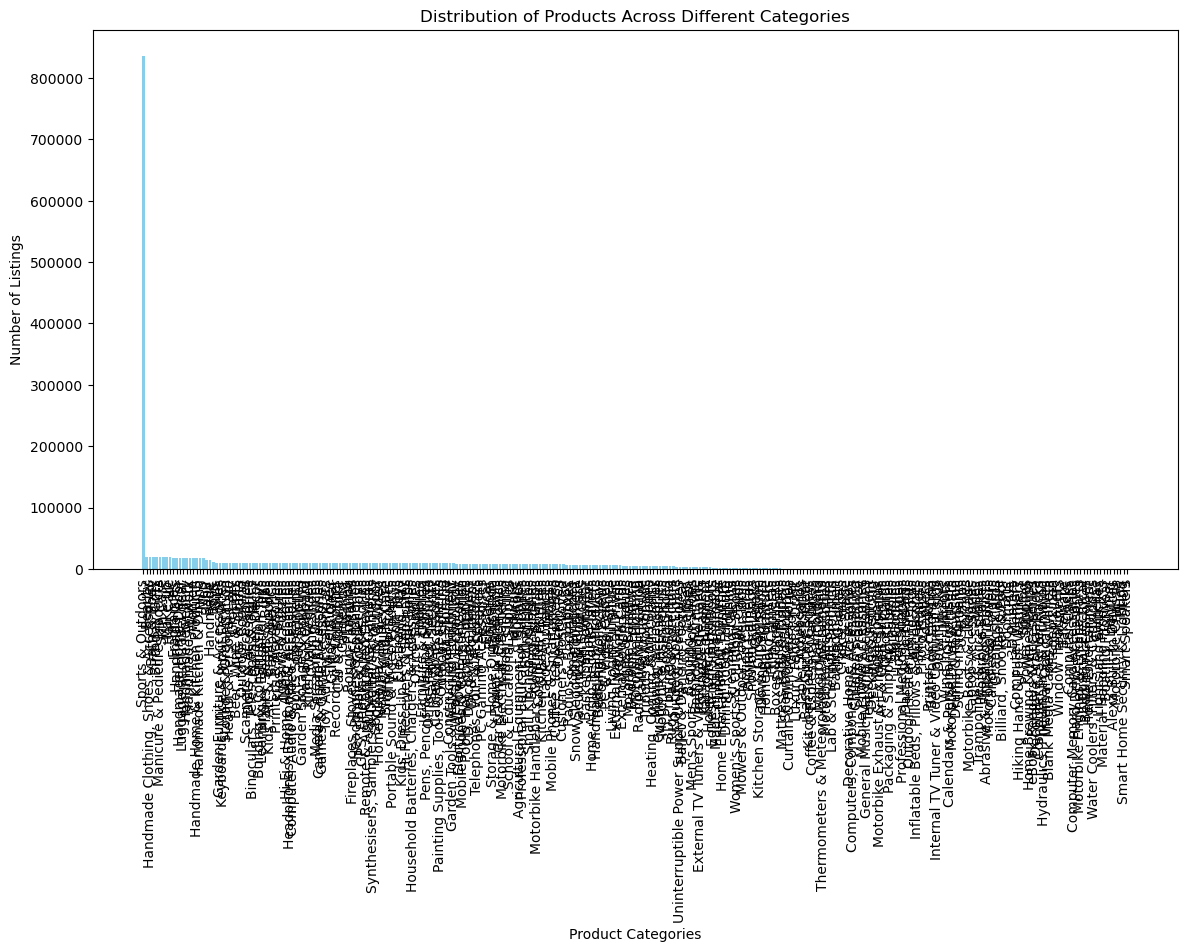

In [30]:
# Plot the bar chart for all categories
plt.figure(figsize=(14, 7))
plt.bar(category_frequency.index, category_frequency.values, color='skyblue')
plt.xlabel('Product Categories')
plt.ylabel('Number of Listings')
plt.title('Distribution of Products Across Different Categories')
plt.xticks(rotation=90)
plt.show()

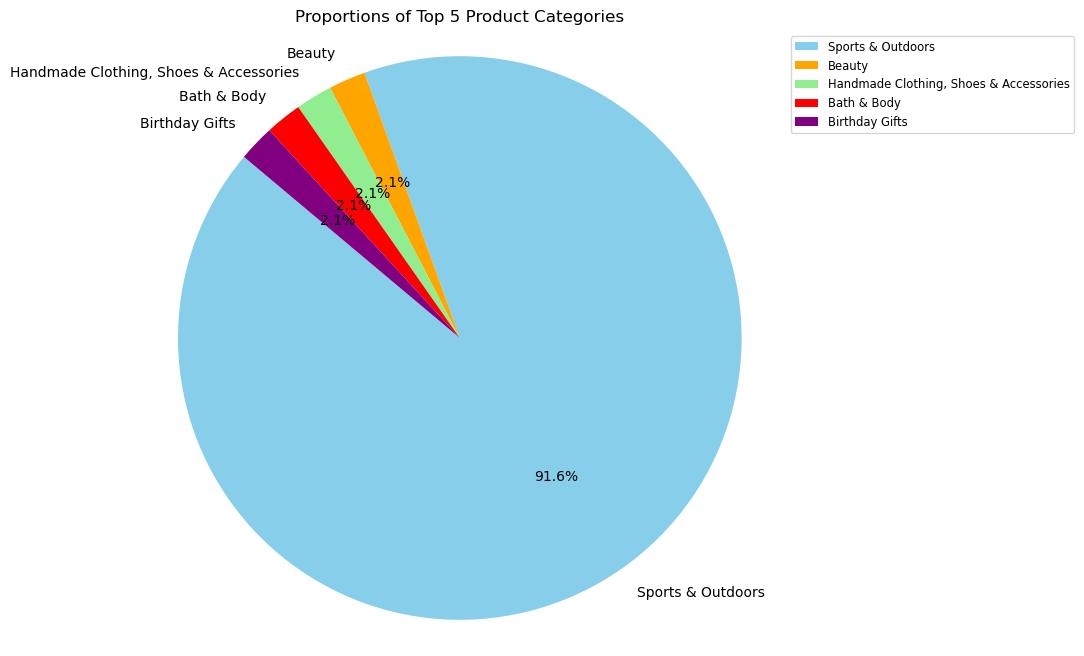

In [28]:
# Plot the pie chart for the top 5 categories
top_5_categories = category_frequency.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_5_categories, labels=top_5_categories.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen', 'red', 'purple'])
plt.title('Proportions of Top 5 Product Categories')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
# Adding a legend with the corresponding colors
plt.legend(top_5_categories.index, loc="best", bbox_to_anchor=(1, 0, 0.5, 1), fontsize='small')
plt.show()

## Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

    1. Measures of Centrality:
        - Calculate the mean, median, and mode for the price of products.
        - What's the average price point of products listed? How does this compare with the most common price point (mode)?

    2. Measures of Dispersion:
        - Determine the variance, standard deviation, range, and interquartile range for product price.
        - How varied are the product prices? Are there any indicators of a significant spread in prices?

    3. Visualizations:
        - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
        - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


In [31]:
# Calculate the mean price
mean_price = df['price'].mean()

# Calculate the median price
median_price = df['price'].median()

# Calculate the mode price
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [33]:
# Calculate the variance
variance = df['price'].var()

# Calculate the standard deviation
std_dev = df['price'].std()

# Calculate the range
price_range = df['price'].max() - df['price'].min()

# Calculate the interquartile range (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

variance, std_dev, price_range, IQR

(119445.48532256528, 345.60886175352226, 100000.0, 36.0)

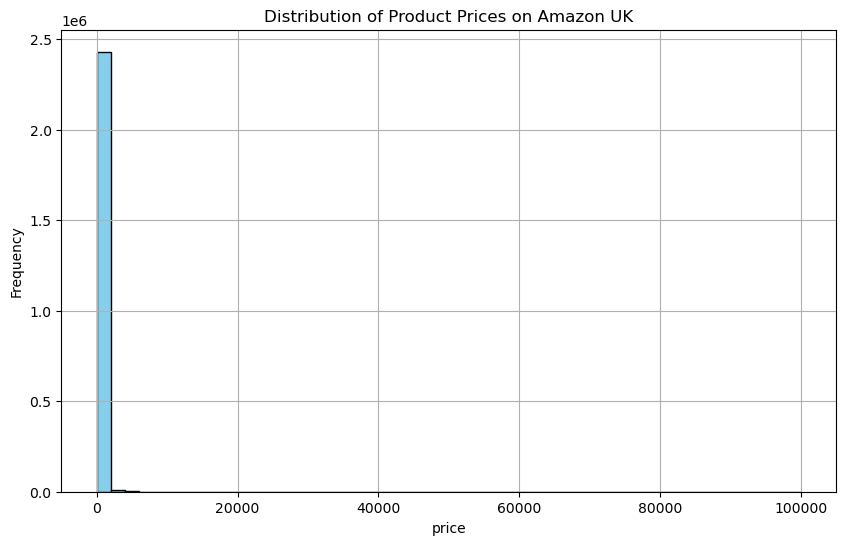

In [34]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices on Amazon UK')
plt.grid(True)
plt.show()

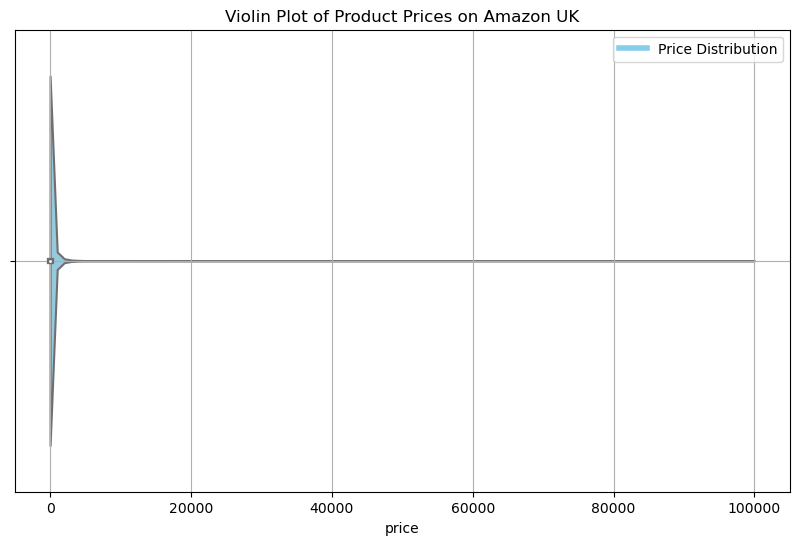

In [40]:
# Plot the violin plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['price'], color='skyblue')

plt.xlabel('price')
plt.title('Violin Plot of Product Prices on Amazon UK')
plt.grid(True)

# Add a legend for the violin plot
legend_elements = [plt.Line2D([0], [0], color='skyblue', lw=4, label='Price Distribution')]

plt.legend(handles=legend_elements, loc='upper right')

plt.show()

## Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

    1. Measures of Centrality:
        - Calculate the mean, median, and mode for the rating of products.
        - How do customers generally rate products? Is there a common trend?

    2. Measures of Dispersion:
        - Determine the variance, standard deviation, and interquartile range for product rating.
        - Are the ratings consistent, or is there a wide variation in customer feedback?

    3. Shape of the Distribution:
        - Calculate the skewness and kurtosis for the rating column.
        - Are the ratings normally distributed, or do they lean towards higher or lower values?

    4. Visualizations:
        - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [42]:
#1 
from scipy import stats
# Calculate the mean rating
mean_rating = df['reviews'].mean()

# Calculate the median rating
median_rating = df['reviews'].median()

# Calculate the mode rating
mode_rating = df['reviews'].mode()[0]

mean_rating, median_rating, mode_rating

(480.6277569914853, 0.0, 0)

In [43]:
# Calculate the variance
variance = df['reviews'].var()

# Calculate the standard deviation
std_dev = df['reviews'].std()

# Calculate the interquartile range (IQR)
Q1 = df['reviews'].quantile(0.25)
Q3 = df['reviews'].quantile(0.75)
IQR = Q3 - Q1

variance, std_dev, IQR

(35332611.92181505, 5944.124150942261, 59.0)

In [44]:
from scipy.stats import skew, kurtosis
# Calculate skewness
skewness = skew(df['reviews'])

# Calculate kurtosis
kurtosis_value = kurtosis(df['reviews'], fisher=False)  # Fisher=False gives Pearson's definition (normal distribution kurtosis=3)

skewness, kurtosis_value

(102.81775868232064, 17743.978302081337)

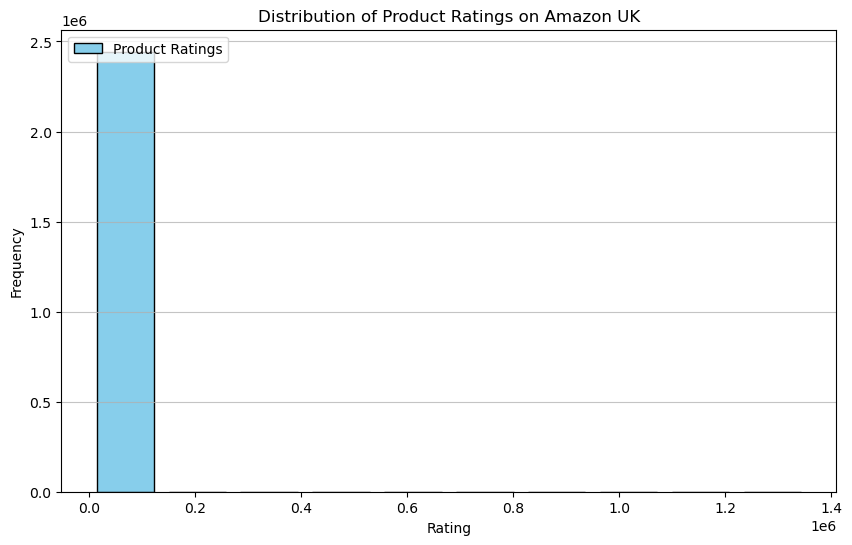

In [47]:
# Plot the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['reviews'], bins=10, color='skyblue', edgecolor='black', rwidth=0.8)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings on Amazon UK')
plt.grid(axis='y', alpha=0.75)

# Add a legend (if appropriate)
patches[0].set_label('Product Ratings')
plt.legend(loc='upper left')

plt.show()